# Biblioteka Vader

Biblioteka Vader jest narzędziem służącym do przeprowadzania analizy sentymentu, a więc badaniem obiektów języka naturalnego pod kątem emocji i innych subiektywnych stanów, trudnych do zidentyfikowania przez systemy maszynowe. Taka identyfikacja jest możliwa w przypadku biblioteki Vader dzięki słownikowi konkretnych słów z przyporządkowanymi do nich sentymentami. Dzięki nim można obliczyć numeryczny wynik frazy składającej się z wielu słów, który później można przełożyć na stwierdzenie o wydźwięku zdania - im wyższy wynik numeryczny, tym zdanie ma pozytywniejszy wydźwięk.

### Importowanie biblioteki

In [4]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Utworzenie instancji obiektu analizującego tekst

In [5]:
sent_analyzer = SentimentIntensityAnalyzer()

## Test działania biblioteki

Przetestujemy główną funkcjonalność na przykładzie prostego zdania.

In [8]:
sentence = "Darth Vader is one of the most powerful sith lords in the history"
print(sent_analyzer.polarity_scores(sentence))

{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.4754}


Zdanie zostało zakwalifikowane jako przeważająco neutralne.

In [10]:
sentence1 = "Darth Vader is the most evil character in entire Star Wars saga"
print(sent_analyzer.polarity_scores(sentence1))

{'neg': 0.453, 'neu': 0.547, 'pos': 0.0, 'compound': -0.8516}


Zdanie zostało ocenione jako neutralno - negatywne.

## Test działania biblioteki dla danych natywnie anglojęzycznych

Sprawdzimy jakość predykcji wydźwięku anglojęzycznych wpisów z portalu Twitter. Dane posiadają już określony sentyment, natomiast biblioteka wykreuje swój własny.

In [11]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/keitazoumana/VADER_sentiment-Analysis/main/data/testdata.manual.2009.06.14.csv"
sentiment_data = pd.read_csv(data_url)

sentiment_data.head(3)

,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
0,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
1,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
2,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...


### Wyłuskanie istotnych informacji

In [12]:

def format_data(data):

  last_col = str(data.columns[-1])
  first_col = str(data.columns[0])

  data.rename(columns = {last_col: 'tweet_text', first_col: 'polarity'}, inplace=True) 

  # Change 0, 2, 4 to negative, neutral and positive
  labels = {0: 'negative', 2: 'neutral', 4: 'positive'}
  data['polarity'] = data['polarity'].map(labels)

  # Get only the two columns
  return data[['tweet_text', 'polarity']]

# Apply the transformation
data = format_data(sentiment_data)
data.head(3)

,tweet_text,polarity
0,Reading my kindle2... Love it... Lee childs i...,positive
1,"Ok, first assesment of the #kindle2 ...it fuck...",positive
2,@kenburbary You'll love your Kindle2. I've had...,positive


### Użycie biblioteki

In [14]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
data["vader_prediction"] = data["tweet_text"].apply(predict_sentiment)

# Show 5 random rows of the data
data.sample(5)

C:\Users\janka\AppData\Local\Temp/ipykernel_16956/2786527729.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["vader_prediction"] = data["tweet_text"].apply(predict_sentiment)


,tweet_text,polarity,vader_prediction
275,SOOO DISSAPOiNTED THEY SENT DANNY GOKEY HOME.....,positive,positive
315,@jonduenas @robynlyn just got us a 50D for the...,positive,positive
0,Reading my kindle2... Love it... Lee childs i...,positive,positive
283,Heading to San Francisco,neutral,neutral
323,#MBA Admissions Tips Stanford GSB Deadlines an...,neutral,neutral


### Porównanie wyników

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(data['polarity'], data['vader_prediction']))

              precision    recall  f1-score   support

    negative       0.84      0.64      0.72       177
     neutral       0.67      0.70      0.68       139
    positive       0.67      0.81      0.73       181

    accuracy                           0.72       497
   macro avg       0.73      0.71      0.71       497
weighted avg       0.73      0.72      0.72       497



W porównaniu do faktycznego wydźwięku twittów, Vaderowi udało się poprawnie zaklasyfikować 72% przypadków. Wskaźnik precyzji informuje nas, że najtrudniej o pomyłkę było w przypadkach twittów o negatywnym wydźwięku.

C:\Users\janka\AppData\Local\Temp/ipykernel_16956/708792457.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\janka\AppData\Local\Temp/ipykernel_16956/708792457.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


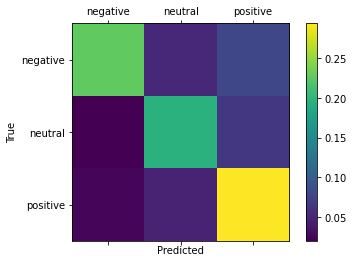

In [37]:
import matplotlib.pyplot as plt
m = confusion_matrix(data['polarity'], data['vader_prediction'], normalize="all")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(m)
fig.colorbar(cax)
labels = ['negative', 'neutral', 'positive']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Z macierzy błędu wynika, że Vader całkiem nieźle poradził sobie z zadaniem. Zdecydowana większość przypadków została zaklasyfikowana poprawnie.

## Test działania biblioteki dla danych natywnie polskojęzycznych tłumaczonych przez zewnętrzne API

Sprawdzimy jakość predykcji wydźwięku polskojęzycznych wpisów pod jednym z postów z portalu Twitter. Aby test był miarodajny, potrzebowaliśmy niemałego zbioru danych, który w polskich warunkach można uzyskać głównie na profilach politycznych przy kontrowersyjnych wpisach.

![](images/main_tweet.png)

(web-scraping danych z Twittera w notebooku "scraping.ipynb", sklejanie plików csv w notebooku "tweets-preparation.ipynb")

In [21]:
twitter_data = pd.read_csv("tweet-replies/bbudka-replies-full.csv")
twitter_data.head()

,tweet,tweet translated,sentiment
0,Pięknie pan mówi. W stylu Gebbelsa 😂,You speak beautifully. In the style of gebbels 😂,negative
1,ciamajdan w Warszawie,Ciamajdan in Warsaw,negative
2,Gomułka junior zamknij się,Gomułka Junior Shut up,negative
3,To wy Budka mówicie że będziecie siłą wyprowad...,You say that you say that you will force peopl...,negative
4,"Albo Polin, albo Putin - innego wyboru nie ma.",Either Polin or Putin - there is no other choice.,negative


### Analiza sentymentu biblioteki i utworzenie nowej kolumny z jej wynikami

In [23]:
twitter_data["vader_prediction"] = twitter_data["tweet translated"].apply(predict_sentiment)

### Wyniki

In [38]:
print(classification_report(twitter_data['sentiment'], twitter_data['vader_prediction']))

              precision    recall  f1-score   support

    negative       0.89      0.38      0.53       714
     neutral       0.08      0.35      0.13        66
    positive       0.06      0.29      0.10        51

    accuracy                           0.37       831
   macro avg       0.34      0.34      0.25       831
weighted avg       0.78      0.37      0.47       831



Dokładność wynosząca 37% to słaby wynik, aczkolwiek z pomiarów precyzji klas wynika, że Vader był w stanie poprawnie zaklasyfikować negatywne wypowiedzi, natomiast te o pozytywnym i neutralnym wydźwięku stanowił dla niego gigantyczny problem.

[[268 249 197]
 [ 18  23  25]
 [ 14  22  15]]


C:\Users\janka\AppData\Local\Temp/ipykernel_16956/1765452783.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\janka\AppData\Local\Temp/ipykernel_16956/1765452783.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


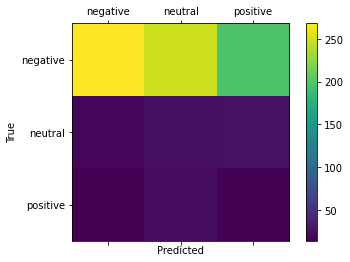

In [40]:
m = confusion_matrix(twitter_data['sentiment'], twitter_data['vader_prediction'])
print(m)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(m)
fig.colorbar(cax)
labels = ['negative', 'neutral', 'positive']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Z macierzy błędu wynika, że w zbiorze danych przeważają twitty o charakterze negatywnym, pozostałe to zaledwie ułamek. 

Przyjrzyjmy się przykładom twittów, które zostały źle zaklasyfikowane w każdej z klas, aby dostrzec pewne zależności.

In [52]:
twitter_data[(twitter_data["sentiment"] == "positive") & (twitter_data["vader_prediction"] != "positive")].head()

,tweet,tweet translated,sentiment,vader_prediction
32,👍🎯👊,Ressive,positive,neutral
34,💪,💪,positive,neutral
49,"Ulica będzie, jeśli kaczytler zrobi przy wybor...",The street will be if Kadzadler makes at least...,positive,negative
88,👏👏👏,👏👏👏,positive,neutral
101,W samo sedno,In the point,positive,neutral


Tutaj widać, że Vader nie jest w stanie poprawnie określić sentymentu, gdy autor używa emoji. 

In [53]:
twitter_data[(twitter_data["sentiment"] == "neutral") & (twitter_data["vader_prediction"] != "neutral")].head()

,tweet,tweet translated,sentiment,vader_prediction
13,KPO głównie dotyczy ekologii. To będzie trudne...,KPO mainly concerns ecology. It will be diffic...,neutral,negative
39,To było po? Przed był incydent z posłem,It was PO? There was an incident with a deputy...,neutral,negative
65,"BTW... jak wydedukowałeś, że popieram PO? XD",Btw ... how did you deduce that I support PO? xD,neutral,positive
82,"Don Diego de la Vega, wyręczłeś mnie - dzięki.😀😉","Don Diego de la Vega, you did me - thanks.",neutral,positive
92,No jak o co ? Szanuje instytucje publiczną,How about what? Respects public institutions,neutral,positive


In [57]:
twitter_data[(twitter_data["sentiment"] == "negative") & (twitter_data["vader_prediction"] != "negative")].head()

,tweet,tweet translated,sentiment,vader_prediction
0,Pięknie pan mówi. W stylu Gebbelsa 😂,You speak beautifully. In the style of gebbels 😂,negative,positive
1,ciamajdan w Warszawie,Ciamajdan in Warsaw,negative,neutral
2,Gomułka junior zamknij się,Gomułka Junior Shut up,negative,neutral
5,"No, IQ Budki z piwem... :)","Well, IQ beer booths ... :)",negative,positive
6,Czy pana dziadek panie był szympansem? Widzę...,Was your grandfather sir? I see some similarit...,negative,positive


Z dwóch powyższych klas widać dobitnie, że Vader bazuje na pewnych słowach kluczowych, które bez względu na kontekst użycia determinują przynależność obserwacji do konkretnej klasy.

## Wnioski

Z powyższych przykładów wynika, że biblioteka Vader jest narzędziem, które może osiągać w zależności od użycia rozbieżne rezultaty. Pomimo, że oba zbiory pochodzą z portalu społecznościowego Twitter, Vader znacznie lepiej określił sentymenty w pierwszym, anglojęzycznym przypadku. Oba testy nie są jednak tak samo miarodajne, ponieważ zbiór drugi należało odpowiednio dostosować do analizy - samo użycie translatora znacznie zniekształciło dane, co widać po powyższych przykładach i zestawieniach tłumaczeń z oryginałami. Ponadto, źródłem danych jest post o zabarwieniu politycznym, który wywoła cały szereg emocji wśród użytkowników - złość, ironię, frustrację, rozbawienie, czyli wszystkie te tak trudne do wykrycia czynniki przez komputer. Szczególnie, że wpływ pojedynczych słów kluczowych często rzutuje na całą frazę, pomimo że są użyte w zupełnie innym kontekście niż tym, który Vader ma zaprogramowany. Prawdopodobnie Vader osiągnąłby wyższe wyniki na platformie z użytkownikami niestosującymi takich zagrywek, których wiadomości nie są zakodowane tak silnymi, trudnymi do odczytania emocjami, np. Reddit.Zwrócić uwagę należy też na fakt, że duża część interakcji w serwisie Twitter zachodzi nie tylko poprzez słowa, ale również za pomocą obrazów. Niestety, Vader nie jest w stanie w jakikolwiek sposób interpretować grafikę, a komentarze pozbawione grafiki często zupełnie tracą kontekst, w którym zostały umieszczone. 